# Macron

*Av Anders Sundell.*

De viktigaste byggstenarna när vi gör analyser i Stata är variabler. De är delar av datamatrisen, där varje analysenhet har ett eget värde.

Men i viss fall kan det vara intressant att använda sig av något som i Stata kallas "macron". Det är tillfälliga objekt, antingen tal eller textsträngar, som kan användas för att effektivisera vår kod.

Macron är som en sorts "stand-ins" för något annat, ett namn som representerar något annat, så att vi kan referera till namnet istället för själva grejen. Beskrivet så kanske det verkar onödigt, men i större skala är det ibland effektivt. När vi använder oss av loopar är de essentiella.

Det finns två typer av macro, "local macros" och "global macros". De fyller exakt samma funktion, men är lite olika i teknisk mening. Vi börjar med att gå igenom globala macron, och forstsätter med de lokala.

## Globala macron

Globala macron är symboler som representerar något annat. Vi anger vad symbolen ska representera, och kan sedan hänvisa till symbolen och få ut det den representerar. **När vi jobbar med macron läser Stata vår kod, och byter ut macrot mot det det representerar.**

Men innan vi ger oss in på olika exempel laddar vi in data att jobba med:

In [14]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


Globala macron anges med ett namn. Tex kan vi skriva

In [1]:
global seven = 7

När vi sedan vill hänvisa till det macrot skriver vi ett dollartecken och sedan namnet. Till exempel:

In [3]:
display $seven

7


Vi angav först att det globala macrot "seven" skulle få värdet 7, och sedan bad vi stata att visa vad samma makro hade för värde, och då var det sju. Den andra raden läses alltså av Stata som `display 7` och då visar Stata 7.

Vi kan göra samma sak med en textsträng, om vi anger textsträngen inom citationstecken:

In [51]:
global seven = "sju är en siffra"

och sedan

In [54]:
display "$seven"

sju är en siffra


Notera att jag nu var tvungen att skriva display `"$seven"`, dvs sätta $seven inom citationstecken. Anledningen är att Stata när den läser koden bara byter ut macrot mot det macrot representerar. Om vi bara hade skrivit

In [13]:
display $seven

sju not found


r(111);


Så får vi ett felmeddelande. Stata läser då koden som `display sju är en siffra` och förstår inte var "sju" är. Om vi vill att Stata ska behandla vårt macro som text måste vi ange det som text.

Men ibland vill vi inte det. Vi kan till exempel ange ett macro som är en kodsnutt, inte ett stycke text. Nedan anger vi att ett macrot m_scatter är en del av en kod som gör en graf.

In [19]:
global m_scatter = "(scatter ti_cpi p_polity2)"

I macrot `m_scatter` finns nu sparat textsträngen `(scatter ti_cpi p_polity2)`. Sedan kan vi använda det macrot för att göra själva grafen:

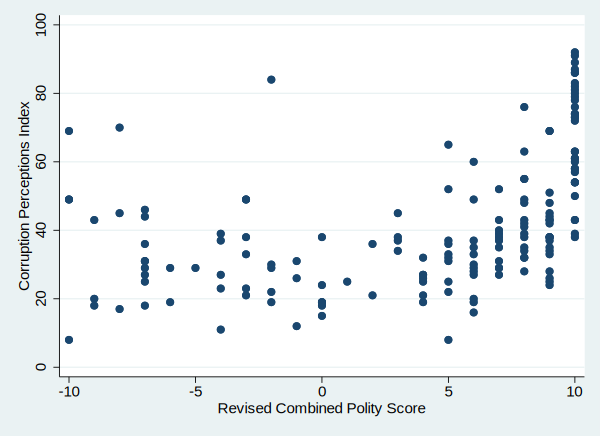

In [20]:
twoway $m_scatter

Stata läser ovanstånde kod som `twoway (scatter ti_cpi p_polity2)` och gör en graf.

Återigen, vad är poängen? Jo, macron är bra om du ska göra samma sak flera gånger. Till exempel kanske du vill köra flera olika regressionsmodeller, med olika beroende variabler, men med samma uppsättning kontrollvariabler.

Du kan givetvis skriva ett stycke kod och kopiera den, men om du vill lägga till en variabel måste du uppdatera på många ställen i koden. Bättre då att skriva:

In [29]:
global controls = "p_polity2 wdi_gdpcapcon2010 lp_lat_abs"

Nu har vi i macrot "controls" sparat textsträngen "p_polity2 i.ht_region lp_lat_abs". När vi sedan skriver $controls tolkar stata det som att vi skrivit `p_polity2 wdi_gdpcapcon2010 lp_lat_abs`. Nedan är ett exempel, där vi gör en regressionsanalys med korruption som beroende variabel, och våra "control variables" som kontrollvariabler, och sedan gör vi om samma analys fast med en annan beroende variabel:

In [31]:
quietly reg ti_cpi $controls 
estimates store m1
quietly reg wdi_lifexp $controls
estimates store m2
esttab m1 m2







--------------------------------------------
                      (1)             (2)   
                   ti_cpi      wdi_lifexp   
--------------------------------------------
p_polity2           0.488**         0.128   
                   (2.87)          (1.27)   

wdi_gdp~2010     0.000654***     0.000182***
                  (10.80)          (5.06)   

lp_lat_abst         19.19**         16.15***
                   (2.70)          (3.82)   

_cons               27.19***        63.49***
                  (15.77)         (62.08)   
--------------------------------------------
N                     129             130   
--------------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


Poängen här är att vi bara behövde ange kontrollvariablerna en gång. Om vi senare kommer på att vi behöver byta ut en kontrollvariabel, eller lägga till en, gör vi det bara i raden där vi anger vad macrot "controls" ska vara för nånting. Vi behöver inte ändra det i varje enskild regressionsanalys.

## Lokala macron

"Lokala macron" fungerar på precis samma sätt, fast med ett undantag. Vi kan ange globala macron, och så finns de kvar till vi stänger Stata. Men lokala macron finns bara inom ramen för samma kodsnutt. De existerar bara inom ramen för vår do-fil ldär det lokala macrot också skapades. Vi hänvisar också till dem på ett lite annat sätt: med `' istället för "". Dvs, till exempel:


In [50]:
local eight = 8

In [55]:
display `eight'

8


Den andra raden visar här att vi refererar till macrot som heter "eight". Om vi inte hade använt oss av tecknen `' så hade Stata letat efter en variabel som hette "eight".

## Avslutning

Globala och lokala macron är alltså två olika sorters "symboler" eller "hållare". Vi kan använda dem istället för något annat, vilket ökar konsekvensen och transparensen i vår kod. Och när vi senare går in på loopar blir de väldigt användbara.